<a href="https://colab.research.google.com/github/majorquev/Introduccion_a_ciencia_de_datos_R_v2/blob/main/Clases/Clase3/Clase3_ejemplo_pr%C3%A1ctico_API_y_WebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte 3: Consumo de APIs con R**


**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales Méndez<br>
**E-mail ayudante:** rumorale1@gmail.com

## **Ejemplo**
Para este ejemplo utilizaremos la API de Accuweather para obtener información del clima.  
Para ello necesitamos contar con los packages `httr` y `jsonlite`

In [ ]:
install.packages("httr")

In [ ]:
install.packages("jsonlite")

In [ ]:
library("httr")
library("jsonlite")
library("dplyr")

## **1. Location key**
Primero, buscaremos el ID de la localidad de la cual nos interesa buscar la temperatura. Para ello utilizaremos la API de localidades (Locations API).

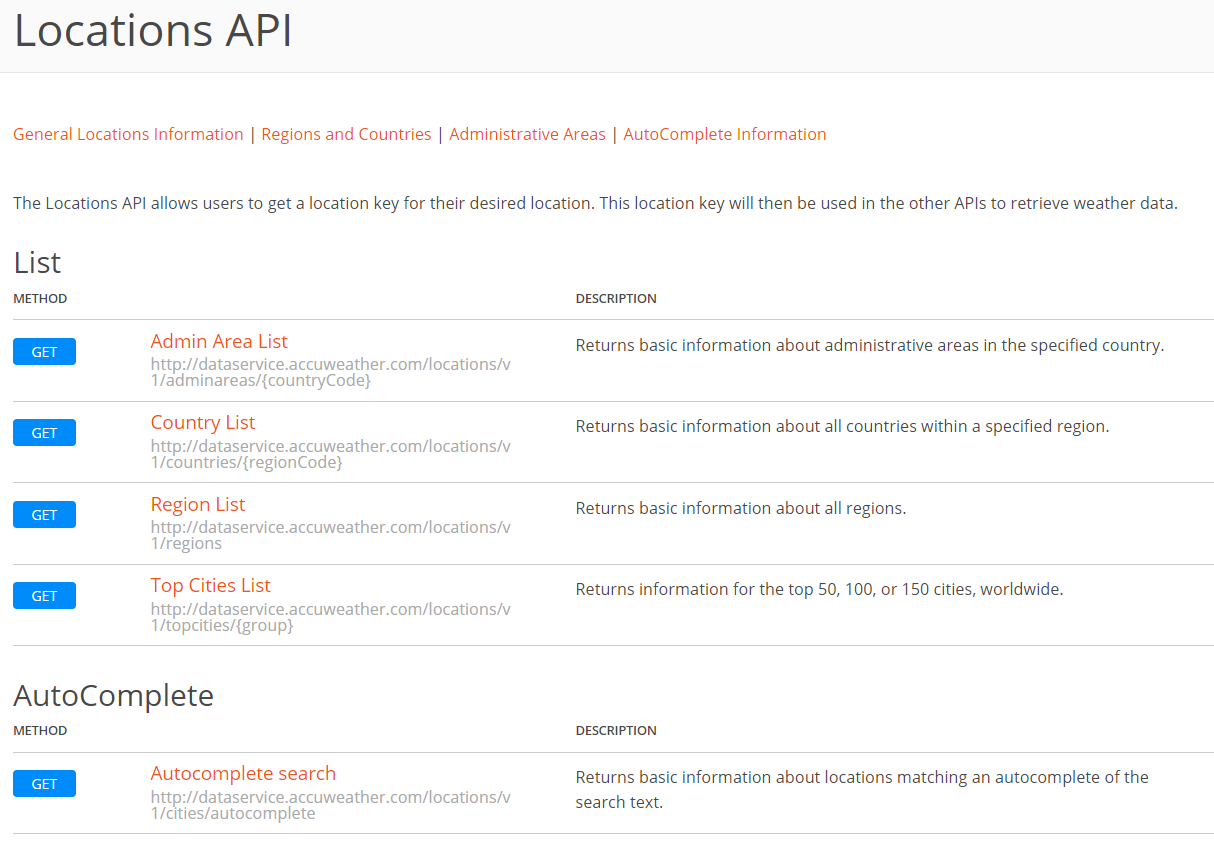

Mediante el método _Autocomplete search_ podemos obtener información básica de una localidad.

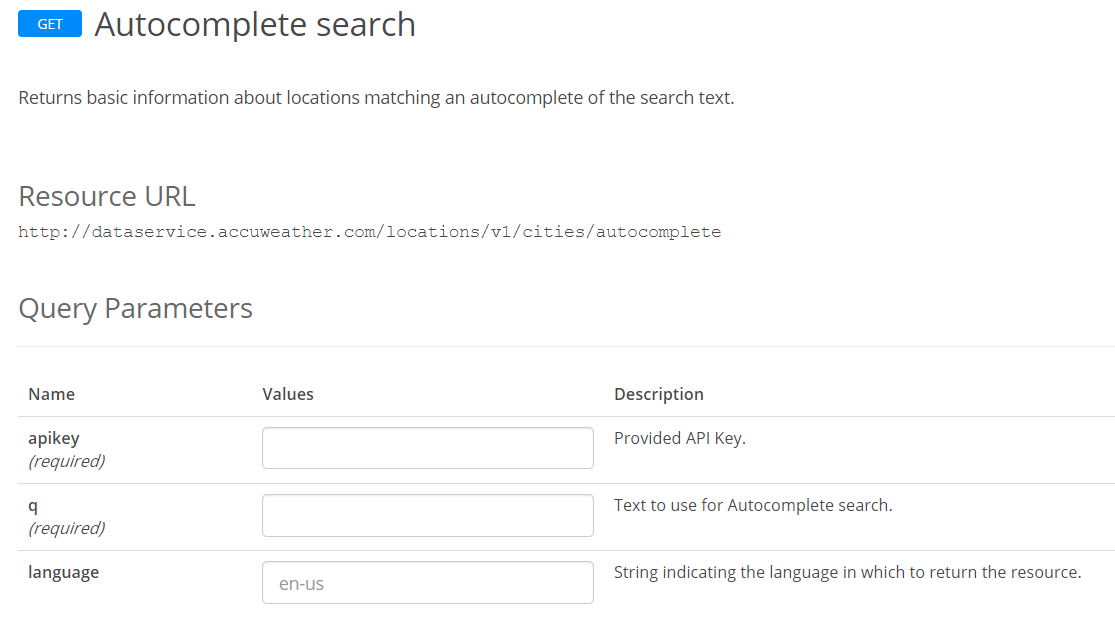

Una manera de enviar la consulta con los respectivos parámetros es incluirlos directamente en la URL de la siguiente manera:

````
<URL base>?apikey=***&param1=valor1&param2=valor2&...
````
Esta dirección la podemos consultar mediante la función `GET()` del package `httr`.


In [ ]:
url_loc <- "http://dataservice.accuweather.com/locations/v1/cities/autocomplete?apikey=MIguWnUihvfOolR57VUvaGa1fJaXrljH&q=Santiago&details=true"

In [ ]:
info_santiago <- httr::GET(url_loc)
info_santiago
# Status 200 indica que la consulta fue exitosa. Los códigos de status se pueden consultar en la documentación
# Los códigos 400 sugieren algún tipo de error en la consulta. 

In [ ]:
str(info_santiago)

La información relevante la podemos rescatar del slot llamado _content_. Para ello podemos extraer el texto que está contenido en dicha entrada.

In [ ]:
head(info_santiago$content)

In [ ]:
text_content <- content(info_santiago, as = "text")
text_content

In [ ]:
content_from_json <- fromJSON(text_content)

In [ ]:
names(content_from_json)
class(content_from_json) # OJO que Colab muestra un error al intentar mostrar el dataframe completo :S

In [ ]:
data.frame(Llave = content_from_json$Key, Ciudad = content_from_json$LocalizedName)

## **2. Daily Forecast**
Para comenzar, utilzaremos la API desarrollada por AccuWeather para consultar el pronóstico diario del clima para una localidad en particular. Para ello consultamos sección de _Forecast API_ de la documentación de referencia para obtener más detalles (https://developer.accuweather.com/apis).

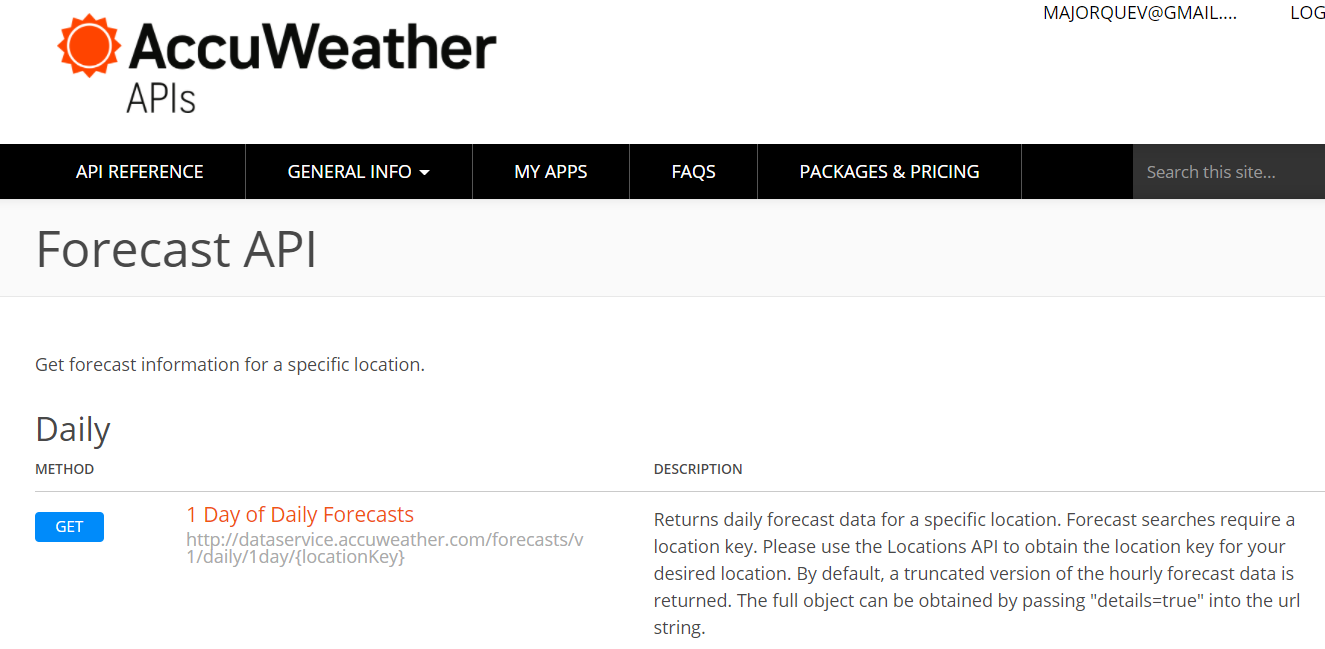

En la sección de _1 Day of Daily Forecast_ encontramos la siguiente documentación

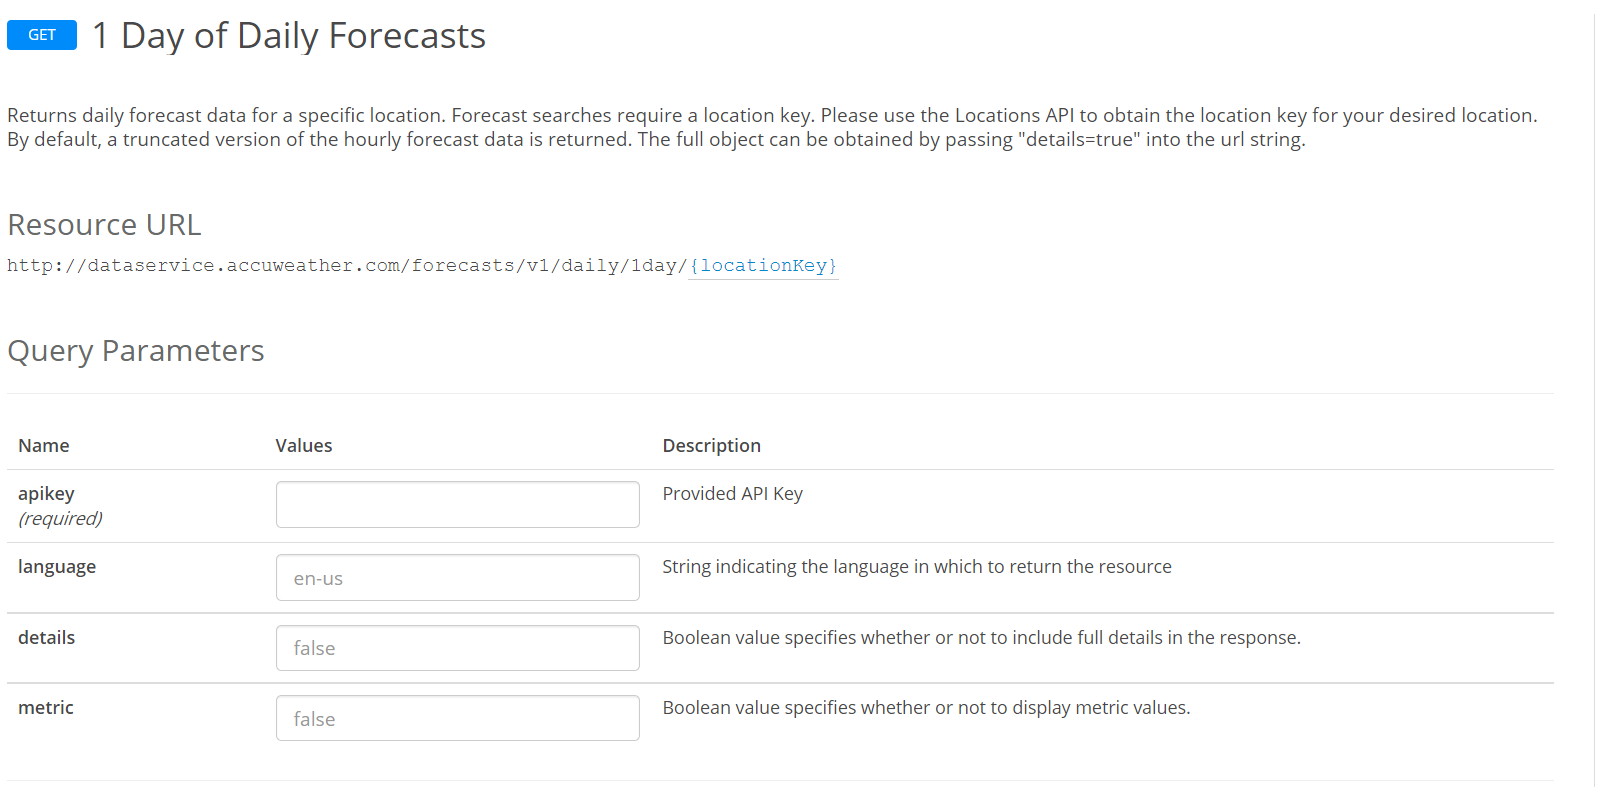

In [ ]:
url <- "http://dataservice.accuweather.com/forecasts/v1/daily/1day/60449?apikey=MIguWnUihvfOolR57VUvaGa1fJaXrljH&language=es-ES&details=true&metric=true"
url

In [ ]:
clima_1d <- httr::GET(url)

In [ ]:
clima_1d

In [ ]:
str(clima_1d)

In [ ]:
head(clima_1d$content)

In [ ]:
text_content <- content(clima_1d, as = "text")

In [ ]:
text_content

In [ ]:

content_from_json <- fromJSON(text_content)

In [ ]:
str(content_from_json)

In [ ]:
names(content_from_json)
content_from_json$Headline
class(content_from_json$Headline)

In [ ]:
str(content_from_json$DailyForecasts)

In [ ]:
content_from_json$DailyForecasts$Temperature$Minimum$Value

In [ ]:
content_from_json$DailyForecasts$Temperature$Minimum

## **3. Parámetros de consulta**
Otra opción para ingresar los parámetros de una consulta (en vez de hacerlo directamente en la url), es meiante el parámetro `query` de la función GET().

In [ ]:
#url_original <- "http://dataservice.accuweather.com/forecasts/v1/daily/1day/60449?apikey=MIguWnUihvfOolR57VUvaGa1fJaXrljH&language=es-ES&details=true&metric=true"
url_base<- "http://dataservice.accuweather.com/forecasts/v1/daily/1day/60449"

In [ ]:
result <- GET(url_base,
                  query = list(apikey = "MIguWnUihvfOolR57VUvaGa1fJaXrljH",       
                               language = "es-ES" )
                  )

In [ ]:
result

In [ ]:
# transformamos el contenido de la respuesta
text_content2 <- content(result, as = "text")

In [ ]:
# El json que está como texto lo transformamos a lista
content_from_json2 <- fromJSON(text_content2)

In [ ]:
str(content_from_json2)

# **Web Scraping con R**

Si bien son muchos los elementos involucrados en este tópico (como HTML, XPath, Css, entre otros conceptos relacionados), en esta sección se mostrarán sólo algunas potencialidades de uso con R, y cómo obtener información básica desde una página Web, como texto y tablas.
Para mayor profundidad sobre los conceptos antes mencionados, puede tener en cuenta las siguientes referencias.


*   Recurso web:  https://cfss.uchicago.edu/notes/web-scraping/
*   Libro: [Munzert Simon et al. 2015] Automated Data Collection with R. A Practical Guide to Web Scraping and Text Mining.



In [ ]:
library(tidyverse)
library(rvest)

## **Ejemplo noticia EMOL**
Una manera básica de extraer un texto desde la web es mendiante la función html_text, la cual recibe el nodo donde está alojado el texto. Los nodos se pueden extraer mediante la función html_nodes().

In [ ]:
url3 <- "https://www.emol.com/"

In [ ]:
noticia <- read_html(x = url3)

In [ ]:
noticia

In [ ]:
encabezado <- html_nodes(x = noticia, css = "#ucHomePage_cuNoticiasCentral_LinkTitulo" )#los argumentos xpath o css indican la ruta del nodo a rescatar 

In [ ]:
encabezado

In [ ]:
# Extraemos del código html, el encabezado que nos interesa pero en formato texto
html_text(x = encabezado )

##**Ejemplo tabla Wikipedia**
También podemos extraer información como tablas desde una página web, mediante la función html_table() indicando el nodo donde está alojada.

In [ ]:
url4 <- "https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population"
info_usa <- read_html(url4)
info_usa

In [ ]:
tabla_html <- html_nodes(x = info_usa, css = "#mw-content-text > div.mw-parser-output > table:nth-child(19)")
tabla_html

In [ ]:
html_table(tabla_html, fill = TRUE)